In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [11]:
data=pd.read_csv('housing.csv')

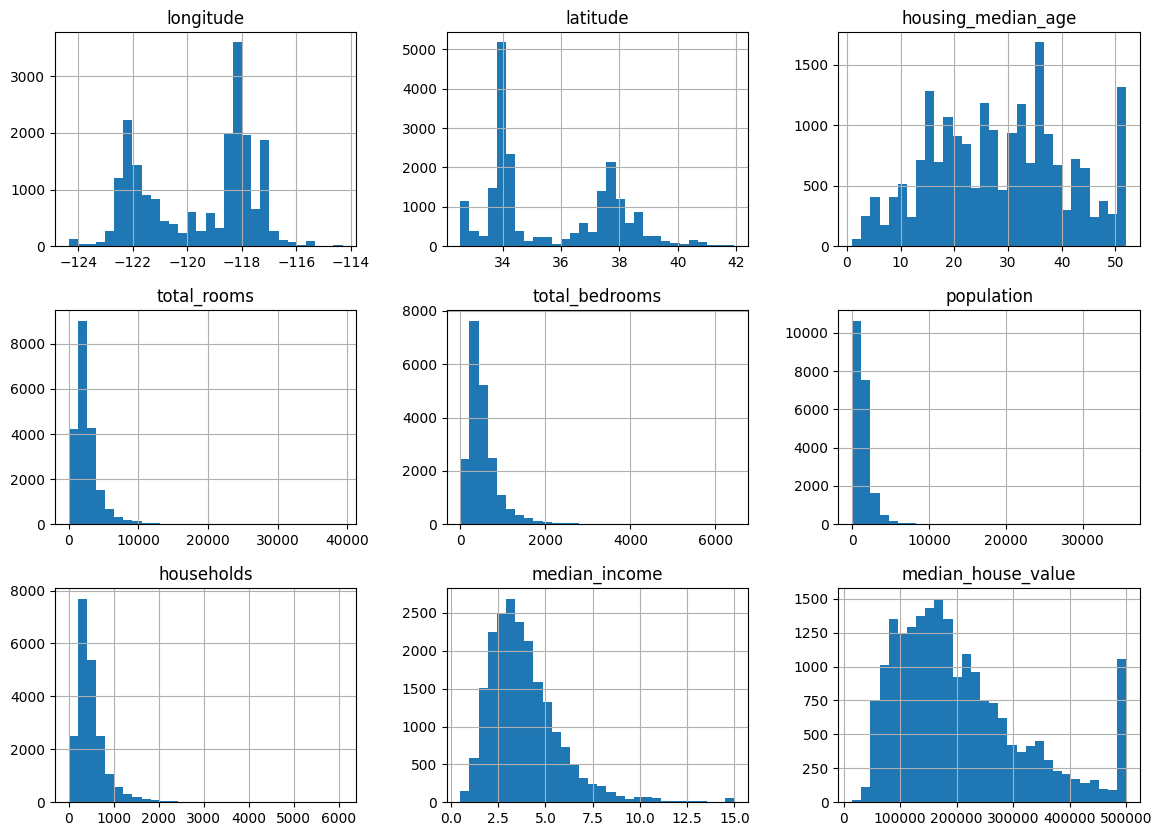

In [12]:
data.hist(bins=30,figsize=(14,10))
plt.show()

In [15]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
 strat_train_set = data.loc[train_index]
 strat_test_set = data.loc[test_index]
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)
